<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Python Course: Spring 2020

Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below.

In [1]:
NAME = "Nicole Kaplan"
COLLABORATORS = ""

---

# Homework 2 - Lidar & Raster Data
## About the 2013 Colorado Floods

The data that you will use for this assignment is the same data that you used in the last assignment. Use: `et.data.get_data("colorado-flood")` to download the data if you do not already have it. 

Using the data from the directory as follows:

In the `colorado-flood/spatial/boulder-leehill-rd/` you will see two directories - pre and post flood. each of these directories contains a lidar sub directory that has a DTM and a DSM.tif file. You will use these files to create your lidar CHM. 


For all of the plots below, be sure to do the following:
* State the source of each dataset that you use to create the plot either as a plot label or in a caption below the plot
* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels!
* Analyze / interpret what each plot shows in a markdown cell in your notebook. State what the source of the data are and what the plot shows as a driver or impact of the 2013 flood events.
* Clearly document that steps that you took to process the data by commenting your code
* Use clean coding practices - this includes comments, variable names that are informative, clean code spacing, following PEP 8 Python code style guide.
* Make sure all of the libraries that you use in the report are listed in a code cell at the TOP of your Notebook.
* Spell check your Notebook before submitting it.
* Include a markdown cell for each histogram that briefly describes how you selected the classification values used in the raster plots referencing the histograms of the data that you create.



### Write Up
In your notebook, create markdown cells below each raster plot that describes what your classification map shows about changes in the landscape before and after the flood.

Be sure to spell check and proof your text before submitting!


### DATA
You can download the data from earthpy using the following syntax:

`et.data.get_data("colorado-flood")`

In [2]:
# Imports for autograding - do not edit!
import matplotcheck.base as mpc
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.raster as ra

## PLOT 1: pre/post CHM difference raster histogram (15 points)

Create a cropped raster map that shows positive and negative change in the canopy height model before and after the flood. To do this:

* Subtract the pre-flood CHM from the post-flood CHM (post_flood_CHM - pre_flood_CHM).
* Crop the data using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp`crop_extent shapefile.

NOTE: I am asking you to subtract the pre-conditions from the post conditions to ensure that your negative values  represent loss of terrain. This will be easier for you to explain in your writeup! 

IMPORTANT: 
* Name your difference CHM object: `diff_chm_crop`.
* Set your bin values to 30 for your plot.


### Import packages

In [3]:
# Import libraries here - be sure to only list packaged used in this assignment 
# Use pep 8 guidelines for the package order. 10 points total for imports + pep 8 throughout

# Import packages for data work
import os
import numpy as np
import numpy.ma as ma 
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import geopandas as gdp

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.mask import mask

import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

### Get Data

In [4]:
# Get the spatial data
os.chdir(os.path.join(et.io.HOME, "earth-analytics" ))
et.data.get_data("colorado-flood")

#Relative path to subfolder
data_path = os.path.join("data", "colorado-flood", "spatial", "boulder-leehill-rd")

#Relative path to tif files
pre_dsm_path = os.path.join(data_path, "pre-flood", "lidar", "pre_DSM.tif")
pre_dtm_path = os.path.join(data_path, "pre-flood", "lidar", "pre_DTM.tif")

post_dsm_path = os.path.join(data_path, "post-flood", "lidar", "post_DTM.tif")    
post_dtm_path = os.path.join(data_path, "post-flood", "lidar", "post_DTM.tif")


### Get clip extent for cropping

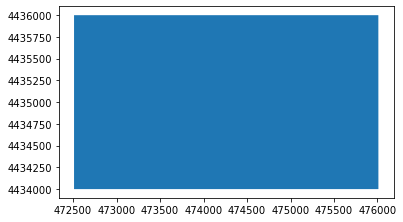

In [5]:
# Read in clip extent from path to use on each tif
clip_extent_path = os.path.join(data_path, "clip-extent.shp")
clip_extent_path

crop_extent = gdp.read_file(clip_extent_path)
crop_extent.plot()


In [6]:
# Use context manager with each tif  

with rio.open(pre_dsm_path) as src:
    pre_dsm = src.read(1, masked=True) # masked as T sets no data value to no data
    spatial_extent = plotting_extent(src)
    crop_pre_dsm, _ = es.crop_image(src, crop_extent) # underscore for no metadata
print(type(pre_dsm))
print(pre_dsm.shape)
#pre_dsm

with rio.open(pre_dtm_path) as src:
    pre_dtm = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)
    crop_pre_dtm, _ = es.crop_image(src, crop_extent) 
print(type(pre_dtm))
print(pre_dtm.shape)

with rio.open(post_dsm_path) as src:
    post_dsm = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)
    crop_post_dsm, _ = es.crop_image(src, crop_extent) 
print(type(post_dsm))
print(post_dsm.shape)

with rio.open(post_dtm_path) as src:
    post_dtm = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)
    crop_post_dtm, _ = es.crop_image(src, crop_extent) 
print(type(post_dtm))
print(post_dtm.shape)

<class 'numpy.ma.core.MaskedArray'>
(2000, 4000)
<class 'numpy.ma.core.MaskedArray'>
(2000, 4000)
<class 'numpy.ma.core.MaskedArray'>
(2000, 4000)
<class 'numpy.ma.core.MaskedArray'>
(2000, 4000)


### Canopy Height models from pre and post flood

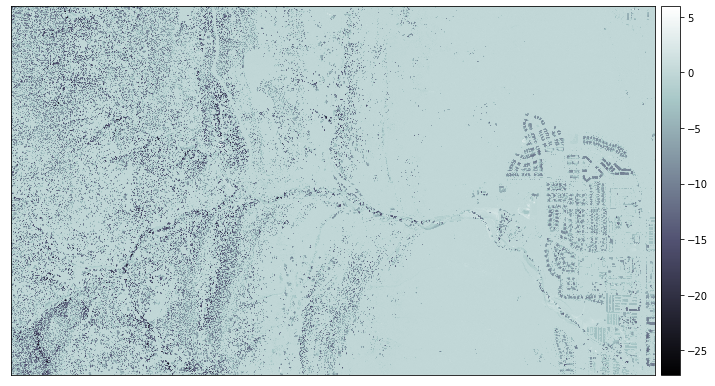

In [7]:
# In this cell, create the difference CHM & DTM objects - it should be a numpy array.
# IMPORTANT: Name this object diff_chm_crop

# Create canopy height model
crop_chm_pre = crop_pre_dsm-crop_post_dsm
crop_chm_post = crop_post_dsm-crop_post_dtm
diff_chm_crop = crop_chm_post-crop_chm_pre

# Plot difference in canopy height model pre and post flood
ep.plot_bands(diff_chm_crop, 
              scale = False,
             cmap="bone")

In [8]:
# Let's make sure you created an object with the correct name and of the correct type above! (5 Points)
try:
    isinstance(diff_chm_crop, np.ndarray)
    print("Great! Your diff chm object is the correct type - np.ndarray")
except AssertionError as message:
    print("AssertionError:",
          "Oops, your clipped image should be a numpy array.")

Great! Your diff chm object is the correct type - np.ndarray


In [9]:
diff_chm_crop.shape

(1, 2000, 3490)

## Plot 1: Histogram of the cropped data

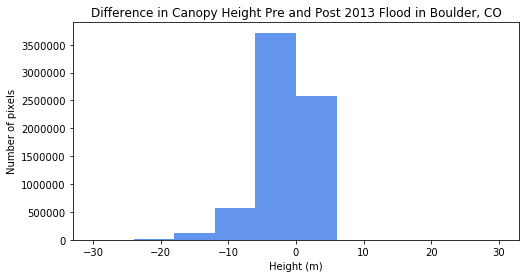

In [10]:
# IMPORTANT: Do not use plt.show in this cell. Add your code to produce plot 1 here

# Histogram of difference between pre and post CHM
ep.hist(diff_chm_crop,
       colors=['cornflowerblue'],
       figsize=(8,4),
       bins=10,
       title="Difference in Canopy Height Pre and Post 2013 Flood in Boulder, CO", 
        xlabel='Height (m)', 
        ylabel='Number of pixels', 
        hist_range=(-30, 30))

### DO NOT REMOVE LINE BELOW ###
plot01_chm_diff_hist = nb.convert_axes(plt, which_axes="current")

## What does the histogram show you? (8 points)
Answer the following questions:

1. What do each bar in the histogram plot above represent?
2. What does this histogram tell you about differences in the CHM and in the landscape before vs after the flood?
3. What is the source of the data that you used to create this plot?
 

1. Each bar represents the frequency or number of times (i.e. counts) a value has that difference in the Canopy Height Model between pre and post flood events.

2. In the image, it appears there was up to 30 meters of material eroded in some areas, and perhaps the deposition is up to approximately 10 meters, but may cover a broader area.

3. Lidar imagery in a raster format as tif files were used to create this plot.  The series of files included 4 images: a pre image of surface and terrain, as well as post images of surface and terrain.  The canopy model generated from the pre flood images was subtracted from the the canopy model generated from the post flood images.

## Plot 2: Classified pre/post CHM difference raster (14 points)

In the cell below, create a plot of the classified the lidar Canopy Height Model raster that you used to create the histogram above. 

Use the following bins to classify your data:

* `< -1`
* `between -1 and 1` 
* `> 1`

Compare your output plotted raster with your histogram.

Add a legend to your plot with the following categories:

* Loss
* No Change
* Gain

These categories should map to the bins that you used to classified the data

[0 1 2 3]


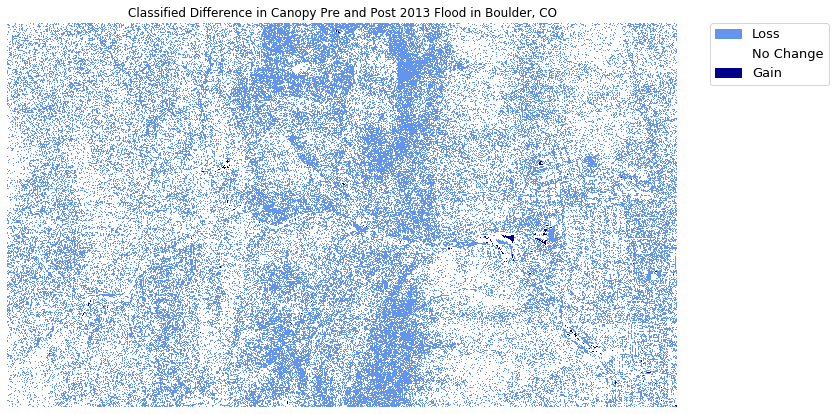

In [11]:
# Reclassify and plot raster data
# Define bins 
class_bins = [-1, 0, 1, np.inf]


# Create list of bin labels and colors
class_bin_labels = ["Loss", "No Change", "Gain"]
cmap_colors=ListedColormap(["cornflowerblue", "white", "darkblue"])

# Re-classify image pixels
diff_chm_crop_class = np.digitize(diff_chm_crop, class_bins)

print(np.unique(diff_chm_crop_class))

# class first class with no data
diff_chm_crop_class_ma = np.ma.masked_where(diff_chm_crop_class == 0,
                                            diff_chm_crop_class,
                                            copy=True)
diff_chm_crop_class_ma
                        
# Plot re-classified data
fig, ax = plt.subplots(figsize=(12,10))
im=ax.imshow(diff_chm_crop_class_ma[0], 
             cmap=cmap_colors)
ep.plot_bands(diff_chm_crop_class_ma,
             scale=False,
             cmap=cmap_colors, 
             ax=ax,
             cbar=False,
             title="Classified Difference in Canopy Pre and Post 2013 Flood in Boulder, CO")

ep.draw_legend(im, titles=class_bin_labels)

ax.set_axis_off()
             


# Manually Graded elements
* Legend has correct labels and colors (3 points)
* X and y axis labels and ticks are not displayed (3 points)

## Plot 3: pre/post DTM Difference Raster Histogram (14 points)

Create a cropped raster map that shows positive and negative change in the digital terrain model before and after the flood. To do this:

* Subtract the pre-flood DTM from the post-flood DTM (post_flood_DTM - pre_flood_DTM).
* Crop the data using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp` crop_extent shapefile.

Plot a histogram of the cropped pre/post DTM data that you created above. Set your bin number to 30 and be sure to label the x and y axis with appropriate units!

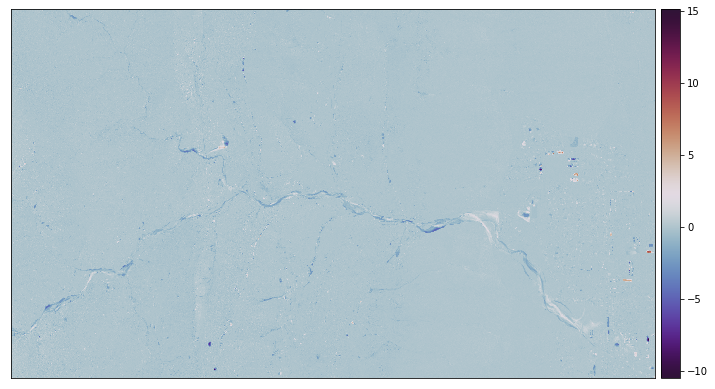

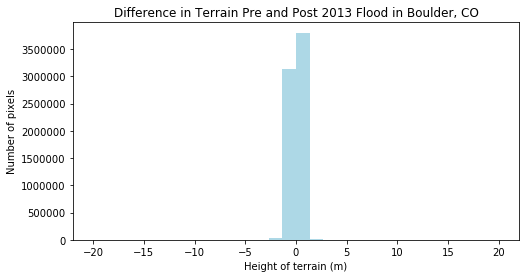

In [12]:
# IMPORTANT: Do not use plt.show in this cell. Add your code for plot 4 here
# Create new terrain/soil surface model for difference between pre and post flood
diff_dtm_crop = crop_post_dtm-crop_pre_dtm

# Plot difference in canopy height model pre and post flood
ep.plot_bands(diff_dtm_crop, 
              scale = False,
             cmap="twilight_shifted")

# Histogram of difference between pre dtm and post dtm
ep.hist(diff_dtm_crop,
       colors=['lightblue'],
       figsize=(8,4),
       bins=30,
       title="Difference in Terrain Pre and Post 2013 Flood in Boulder, CO", 
        xlabel='Height of terrain (m)', 
        ylabel='Number of pixels', 
        hist_range=(-20, 20))


### DO NOT REMOVE LINE BELOW ###
plot_3_answer = nb.convert_axes(plt, which_axes="current")

In [13]:
# Let's make sure you created an object with the correct name and of the correct type above! (5 Points)
try:
    isinstance(diff_dtm_crop, np.ndarray)
    print("Great! Your diff dtm object is the correct type - np.ndarray")
except AssertionError as message:
    print("AssertionError:",
          "Oops, your clipped image should be a numpy array.")

Great! Your diff dtm object is the correct type - np.ndarray


In [14]:
diff_dtm_crop.shape

(1, 2000, 3490)

### Plot 4: pre/post DTM difference raster (15 points)

Reclassify your difference DTM using the following range values:

* `< -1`
* `between -1 and 1` 
* `> 1`

Plot your difference DTM raster using matplotlib.
Create a legend for your plot that has 3 categories: 

* Loss
* No Change
* Gain

Each category should represent one of the "bins" that you used when you classified your data. 

[0 1 2 3]


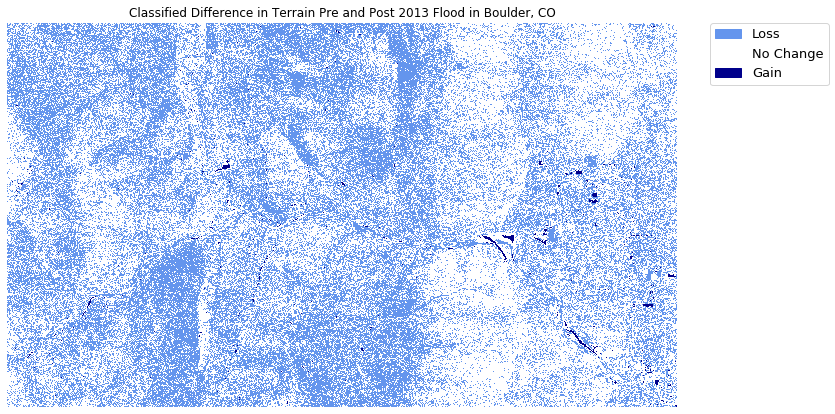

In [15]:
# Reclassify and plot raster data
# Define bins 
class_bins = [-1, 0, 1, np.inf]


# Create list of bin labels and colors
class_bin_labels = ["Loss", "No Change", "Gain"]
cmap_colors=ListedColormap(["cornflowerblue", "white", "darkblue"])

# Re-classify image pixels
diff_dtm_crop_class = np.digitize(diff_dtm_crop, class_bins)

print(np.unique(diff_dtm_crop_class))

# class first class with no data
diff_dtm_crop_class_ma = np.ma.masked_where(diff_dtm_crop_class == 0,
                                            diff_dtm_crop_class,
                                            copy=True)
diff_dtm_crop_class_ma
                        
# Plot re-classified data
fig, ax = plt.subplots(figsize=(12,10))
im=ax.imshow(diff_dtm_crop_class_ma[0], 
             cmap=cmap_colors)
ep.plot_bands(diff_dtm_crop_class_ma,
             scale=False,
             cmap=cmap_colors, 
             ax=ax,
             cbar=False,
             title="Classified Difference in Terrain Pre and Post 2013 Flood in Boulder, CO")

ep.draw_legend(im, titles=class_bin_labels)

ax.set_axis_off()

# Manually Graded plot elements (SKIP THIS CELL)
* Legend has correct labels and colors (2 points)
* X and y axis labels and ticks are not displayed (1 points)

##  Question (7 points)

* Look at the CHM plot and compare it to the DTM difference plot that you created above
* Consider how the data were collected, what they show and how they were processed? What factors could impact and add uncertainty to the CHM difference map?

Add your answer below using markdown 

The difference in the classified digital terrain models shows more areas of gain, where the soil surface may have gained material from the flood.  Since flooding is for the most part a soil and stream surface event, it would make sense to me that the DTM shows more loss and gain than a model of the canopy in the CHM plot.  

The flood event could have significantly altered human dimensions of the surface, so gains may actually consist of debris of flooded structures and not necessarily the canopy of vegetation.

